### CUSTOMER CHURN

In [1]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
churn_df=pd.read_csv("https://raw.githubusercontent.com/Code-Unnati/Advance-Course/master/Module-1/Unit-2/Unit-2.2/ChurnData.csv")
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [4]:
print(churn_df.info())
print('\n')
print(churn_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [5]:
#it takes some colums

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',  'callcard', 'wireless','churn']]
churn_df['churn']=churn_df['churn'].astype('int')
print(churn_df.shape)
churn_df.head()

(200, 10)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
# to convert data into numpy array

X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]

X=X.drop(['tenure'],axis=1) #to discard a column

Y=churn_df[['churn']]
np_X=np.asanyarray(X)
np_Y=np.asanyarray(Y)

In [7]:
#to display data converted into numpy array

np_X

array([[ 33.,   7., 136., ...,   0.,   1.,   1.],
       [ 33.,  12.,  33., ...,   0.,   0.,   0.],
       [ 30.,   9.,  30., ...,   0.,   0.,   0.],
       ...,
       [ 32.,  10.,  47., ...,   0.,   1.,   0.],
       [ 30.,   0.,  25., ...,   0.,   1.,   1.],
       [ 50.,  16., 190., ...,   1.,   1.,   1.]])

In [8]:
# Preprocess the data

from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
std_scl.fit(np_X)
np_X_procs=std_scl.transform(np_X)

In [9]:
#For train and test of data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np_X_procs, np_Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, Y_train.shape)
print ('Test set:', X_test.shape, Y_test.shape)

Train set: (160, 8) (160, 1)
Test set: (40, 8) (40, 1)


In [10]:
model=LogisticRegression(C=0.02,solver='liblinear',verbose=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

[LibLinear]

In [11]:
# to check the prediction
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [12]:
# for prediction outcome and probability

Y_pred=model.predict(X_test)
Y_pred_prob=model.predict_proba(X_test)
print(Y_pred)
print('\n')
print((Y_pred_prob))

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 1]


[[0.62031646 0.37968354]
 [0.55488968 0.44511032]
 [0.54444592 0.45555408]
 [0.71854534 0.28145466]
 [0.54796322 0.45203678]
 [0.70793093 0.29206907]
 [0.52412013 0.47587987]
 [0.57557893 0.42442107]
 [0.42052016 0.57947984]
 [0.58903846 0.41096154]
 [0.52651019 0.47348981]
 [0.57638279 0.42361721]
 [0.61137256 0.38862744]
 [0.42549216 0.57450784]
 [0.78634604 0.21365396]
 [0.54432479 0.45567521]
 [0.50415314 0.49584686]
 [0.39744391 0.60255609]
 [0.43347491 0.56652509]
 [0.64435798 0.35564202]
 [0.47921641 0.52078359]
 [0.50675529 0.49324471]
 [0.68207613 0.31792387]
 [0.54703318 0.45296682]
 [0.46222049 0.53777951]
 [0.79057442 0.20942558]
 [0.45601047 0.54398953]
 [0.47500789 0.52499211]
 [0.52947839 0.47052161]
 [0.77698961 0.22301039]
 [0.778231   0.221769  ]
 [0.52760938 0.47239062]
 [0.43885015 0.56114985]
 [0.81674313 0.18325687]
 [0.66400844 0.33599156]
 [0.66558063 0.33441937]
 [0.53740395 0.

Model achieved a classification accuracy of:	0.625


Model Confusion Matrix


Jaccard Similarity Score:	0.25


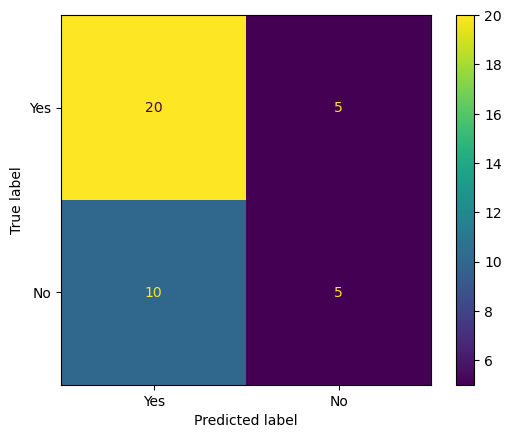

In [13]:
# For Confusion Mattrix and Jaccard Similarity Score

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Model achieved a classification accuracy of:",end='\t')
print(accuracy_score(Y_test,Y_pred))
dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=["Yes","No"])
print('\n')
dsp.plot()
print("Model Confusion Matrix")
from sklearn.metrics import jaccard_score
print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(Y_test,Y_pred))